In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn import preprocessing

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values
y = label.values

In [ ]:
def design_matrix(x, M):
    # x = x.reshape(-1,5,1)
    # PhiX = np.power(x, np.arange(M+1))
    # return PhiX
    xshape = x.shape
    x_new = x
    for i in range(2, M+1):
        temp = np.power(x, np.full(shape=xshape, fill_value=i))
        x_new = np.hstack([x_new, temp])
        # print(i)
        # print(x_new.shape)
    
    PhiX = np.hstack([np.ones(shape=(xshape[0],1)), x_new])
    return PhiX

In [ ]:
def RidgeRegression(a, xtrain, xtest, ytrain, ytest):
    regr = Ridge(alpha=a, fit_intercept=True).fit(xtrain, ytrain)
    yhat_train = regr.predict(xtrain)
    yhat_test = regr.predict(xtest)

    #print(regr.coef_.shape)

    return yhat_train, yhat_test

In [ ]:
# returns array of alpha values that return the lowest MSE value for the testing data set
def findBestAlpha(x_train, x_test, y_train, y_test, astart = 0, astop = 1, astep = 0.01):
    alpha_values = np.arange(astart, astop, astep)
    maetest_values = []
    maetrain_values = []

    for i in range(0,len(alpha_values)):
        yhat_train, yhat_test = RidgeRegression(alpha_values[i], x_train, x_test, y_train, y_test)

        MAE_test = np.mean(np.abs(yhat_test - y_test))
        MAE_train = np.mean(np.abs(yhat_train - y_train))

        maetest_values.append(MAE_test)
        maetrain_values.append(MAE_train)

        #print("Training MAE", MAE_train)
        #print("Testing MAE", MAE_val)

    min_train_mae = np.amin(maetrain_values)
    min_test_mae = np.amin(maetest_values)

    best_train_alpha = alpha_values[np.where(maetrain_values == min_train_mae)]
    best_test_alpha = alpha_values[np.where(maetest_values == min_test_mae)]

    # print(f"The minimum MAE training value was {min_train_mae} with an alpha of {best_train_alpha}")
    # print(f"The minimum MAE testing value was {min_test_mae} with an alpha of {best_test_alpha}")

    # print("Y | Y-hat:")
    # Y = np.hstack([y_test.reshape((-1, 1)), yhat_test.reshape((-1, 1))])
    # with np.printoptions(precision=2):
    #     print(Y[:10,:])

    return best_test_alpha

In [ ]:
# normalizing data
Xs = preprocessing.scale(X)
#y = preprocessing.scale(y)
# splitting data
X_train, X_val, y_train, y_val = model_selection.train_test_split(Xs, y, test_size=0.5, train_size=0.5, random_state=123)
print(X_train.shape)
print(y_train.shape)

M = 5 #appears to be the best M-value
X_train = design_matrix(X_train, M)
print(X_train.shape)
X_val = design_matrix(X_val, M)
# print(X_val.shape)

# get the best alpha value
validation_alpha = findBestAlpha(X_train, X_val, y_train, y_val, astop=10)[0]
print(f"Best Alpha: {validation_alpha}")

'''
I created a design matrix that has M*5+1 columns (from the M order polynomial and 5 features in the data) and 62 rows (from the original data)
The design matrix looks like (for a dataset with only 2 features x1,x2 and M=3):
[ 1 + x1 + x1^2 + x1^3 + x2 + x2^2 + x2^3 ]
[ ... ...  ...    ...    ...  ...    ...  ]


The weights for each value are found in the sklearn Ridge regression function
Used to calculate the 26 different weights (for a M=5) which made the alpha value non-zero
The function for outputting yhat looks like (for a dataset with only 2 features x1,x2 and M=3): 
yhat = w0 + w1*x1 + w2*x1^2 + w3*x1^3 + w4*x2 + w5*x2^2 + w6*x2^3 ]

*However since the alpha is non-zero some of the weights that are removed due to the regularization (I think)

'''
print()

(62, 5)
(62, 1)
(62, 26)
Best Alpha: 0.04



In [ ]:
''' 
The test set will be released on Sunday night
'''
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values
# print(X_test[:,0])
X = preprocessing.scale(X_test)
# print(X_test[:,0])
#y_test = preprocessing.scale(y_test)

X = design_matrix(X, M)
yhat_train, yhat_test = RidgeRegression(validation_alpha, X_train, X, y_train, y_test)

mae_test = np.mean(np.abs(yhat_test - y_test))
mae_train = np.mean(np.abs(yhat_train - y_train))

print(f"Training MAE: {mae_train}")
print(f"Testing MAE: {mae_test}")

Training MAE: 14.329912981486665
Testing MAE: 44.34968861804575


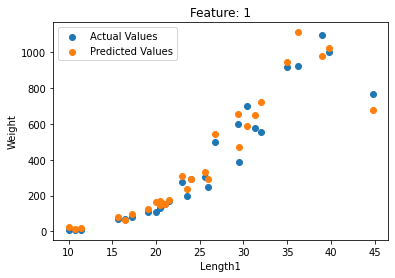

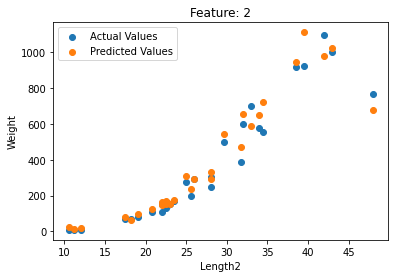

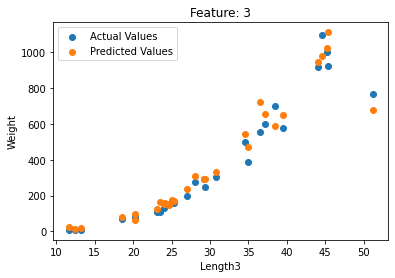

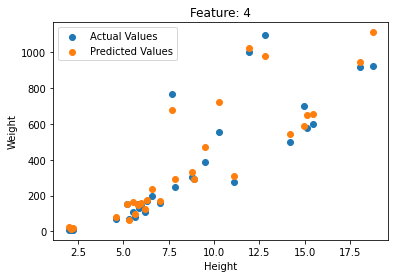

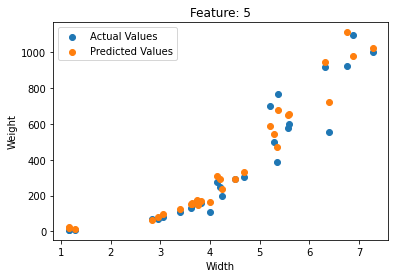

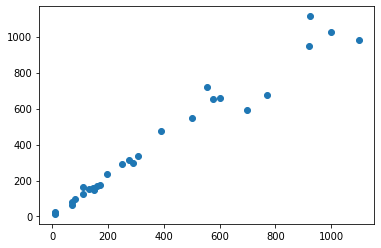

In [ ]:
for i in range(0,X_test.shape[1]):
    plt.figure()
    plt.scatter(X_test[:,i], y_test)
    plt.scatter(X_test[:,i], yhat_test)
    plt.legend(["Actual Values", "Predicted Values"])
    plt.xlabel(f"{feature.columns.values[i]}")
    plt.ylabel(f"{label.columns.values[0]}")
    plt.title(f"Feature: {i+1}")

plt.figure()
plt.scatter(y_test, yhat_test)